<a href="https://colab.research.google.com/github/sbmccall/data-science-projects/blob/main/telco-customer-churn/notebooks/telco_customer_churn_sbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data and Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/SBM1993/data-science-projects/refs/heads/main/telco-customer-churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# Display First 5 Rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# 2. Data Cleaning

## 2a. Data Inspecting

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- All columns appear to be have their proper Dtype besides TotalCharges

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df.gender.value_counts()

,count
gender,
Male,3555
Female,3488


In [8]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [9]:
df.Partner.value_counts()

,count
Partner,
No,3641
Yes,3402


In [10]:
df.Dependents.value_counts()

,count
Dependents,
No,4933
Yes,2110


In [11]:
df.tenure.value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [12]:
df.PhoneService.value_counts()

,count
PhoneService,
Yes,6361
No,682


In [13]:
df.MultipleLines.value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [14]:
df.InternetService.value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [15]:
df.OnlineSecurity.value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [16]:
df.OnlineBackup.value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [17]:
df.DeviceProtection.value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [18]:
df.TechSupport.value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [19]:
df.StreamingTV.value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [20]:
df.StreamingMovies.value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [21]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [22]:
df.PaperlessBilling.value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [23]:
df.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [24]:
df.MonthlyCharges.value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
23.65,1
114.70,1
43.65,1


In [25]:
df.TotalCharges.value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


In [26]:
df.Churn.value_counts()
# print(df.Churn.value_counts() / df.Churn.value_counts().sum())

,count
Churn,
No,5174
Yes,1869


In [27]:
df.Churn.value_counts().sum()

7043

Based on my exploration of the data, I believe these are the most relevant features that I will initally build my classifcation model on. I'm going to do some transforming of the data before I start EDA.

Potential Features
1. Gender
2. SeniorCitizen
3. Partner or Dependents
4. Tenure
4. Number of services
5. Contract
6. Paperless Billing
7. Payment Method
8. MonthlyCharges

## 2b. Data Manipulation

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Changing Yes and No to 1 and 0 respectively
df_features = df.copy()

df_features['Partners_or_Dependents'] = np.where((df_features['Partner']=='Yes') | (df_features['Dependents']=='Yes'), 'Yes', 'No')

In [30]:
df_features.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners_or_Dependents
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [31]:
df_features.drop(columns=['Partner', 'Dependents'], inplace=True)

df_features.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners_or_Dependents
0,7590-VHVEG,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,5575-GNVDE,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,3668-QPYBK,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


List of 9 Features to that will be combined:
- PhoneService
 - Yes, No
- MultipleLines
 - Yes, No, No phone service
- InternetService
 - Fiber optic, DSL, No
- OnlineSecurity
 - Yes, No, No internet service
- OnlineBackup
 - Yes, No, No internet service
- DeviceProtection
 - Yes, No, No internet service
- TechSupport
 - Yes, No, No internet service
- StreamingTV
 - Yes, No, No internet service
- StreamingMovies
 - Yes, No, No internet service


In [32]:
# List of columns with "Yes", "No", "No phone service", and "No internet service"
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert Yes -> 1 No, No phone service & No internet service -> 0
df_features[service_columns] = df_features[service_columns].apply(lambda x: x.map({'Yes': 1, 'Fiber optic': 1, 'DSL': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}))

In [33]:
df_features.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners_or_Dependents
0,7590-VHVEG,Female,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,5575-GNVDE,Male,0,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No,No
2,3668-QPYBK,Male,0,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [34]:
for col in service_columns:
  print(f'Unique values in {col}: {df_features[col].unique()}')

Unique values in PhoneService: [0 1]
Unique values in MultipleLines: [0 1]
Unique values in InternetService: [1 0]
Unique values in OnlineSecurity: [0 1]
Unique values in OnlineBackup: [1 0]
Unique values in DeviceProtection: [0 1]
Unique values in TechSupport: [0 1]
Unique values in StreamingTV: [0 1]
Unique values in StreamingMovies: [0 1]


In [35]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   SeniorCitizen           7043 non-null   int64  
 3   tenure                  7043 non-null   int64  
 4   PhoneService            7043 non-null   int64  
 5   MultipleLines           7043 non-null   int64  
 6   InternetService         7043 non-null   int64  
 7   OnlineSecurity          7043 non-null   int64  
 8   OnlineBackup            7043 non-null   int64  
 9   DeviceProtection        7043 non-null   int64  
 10  TechSupport             7043 non-null   int64  
 11  StreamingTV             7043 non-null   int64  
 12  StreamingMovies         7043 non-null   int64  
 13  Contract                7043 non-null   object 
 14  PaperlessBilling        7043 non-null   

In [36]:
# Combining services columns into one column called "num_of_services" so that I
# can see per customer, how many services have they signed up for?

df_features['num_of_services'] = df_features[service_columns].sum(axis=1)

In [37]:
df_features.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners_or_Dependents,num_of_services
0,7590-VHVEG,Female,0,1,0,0,1,0,1,0,...,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes,2
1,5575-GNVDE,Male,0,34,1,0,1,1,0,1,...,0,0,One year,No,Mailed check,56.95,1889.5,No,No,4
2,3668-QPYBK,Male,0,2,1,0,1,1,1,0,...,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,4
3,7795-CFOCW,Male,0,45,0,0,1,1,0,1,...,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,4
4,9237-HQITU,Female,0,2,1,0,1,0,0,0,...,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,2


In [38]:
df_features.drop(columns=service_columns, inplace=True)

In [39]:
binary_cols = ['PaperlessBilling', 'Churn', 'Partners_or_Dependents']
df_features[binary_cols] = df_features[binary_cols].replace({'Yes':1, 'No': 0}).astype('int')

<ipython-input-39-a4a251c29b12>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features[binary_cols] = df_features[binary_cols].replace({'Yes':1, 'No': 0}).astype('int')


In [40]:
df_features.head()

,customerID,gender,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partners_or_Dependents,num_of_services
0,7590-VHVEG,Female,0,1,Month-to-month,1,Electronic check,29.85,29.85,0,1,2
1,5575-GNVDE,Male,0,34,One year,0,Mailed check,56.95,1889.5,0,0,4
2,3668-QPYBK,Male,0,2,Month-to-month,1,Mailed check,53.85,108.15,1,0,4
3,7795-CFOCW,Male,0,45,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,4
4,9237-HQITU,Female,0,2,Month-to-month,1,Electronic check,70.70,151.65,1,0,2


In [44]:
df_features.TotalCharges = df_features.TotalCharges.replace(' ', np.nan).astype('float')

In [46]:
df_features.describe(include='O')

,customerID,gender,Contract,PaymentMethod
count,7043,7043,7043,7043
unique,7043,2,3,4
top,7590-VHVEG,Male,Month-to-month,Electronic check
freq,1,3555,3875,2365


In [47]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   SeniorCitizen           7043 non-null   int64  
 3   tenure                  7043 non-null   int64  
 4   Contract                7043 non-null   object 
 5   PaperlessBilling        7043 non-null   int64  
 6   PaymentMethod           7043 non-null   object 
 7   MonthlyCharges          7043 non-null   float64
 8   TotalCharges            7032 non-null   float64
 9   Churn                   7043 non-null   int64  
 10  Partners_or_Dependents  7043 non-null   int64  
 11  num_of_services         7043 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 660.4+ KB


- Now that my data is in a better looking spot, I'm not going to start Exploratory Data Analysis.

# 3.Exploratory Data Analysis

## 3a. Distributions of Numeric Variables

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PaperlessBilling'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'Churn'}>],
       [<Axes: title={'center': 'Partners_or_Dependents'}>,
        <Axes: title={'center': 'num_of_services'}>, <Axes: >]],
      dtype=object)

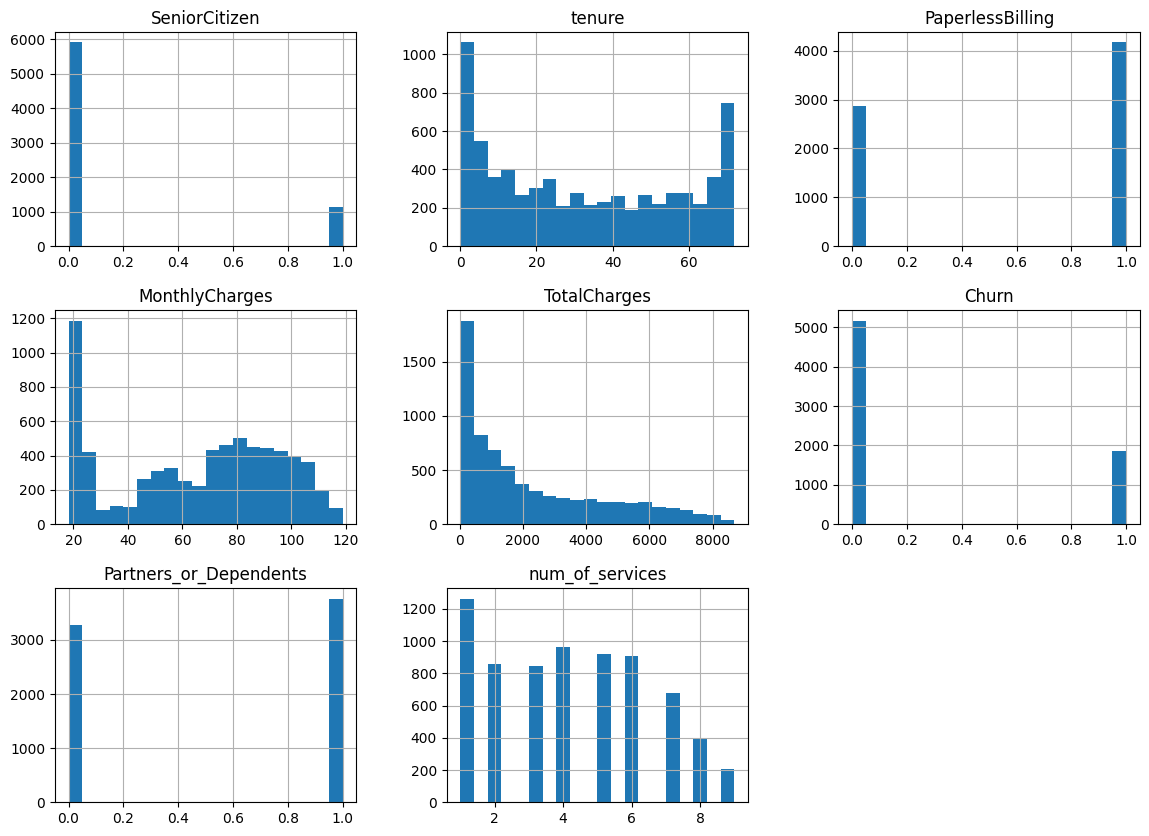

In [54]:
df_features.hist(figsize=(14, 10), bins=20)

* Churn (Target Variable)
 - Dataset is imbalanced (more non-churners than churners).
* Tenure
 - Many customers have very short tenure (0 - 5 months) or long tenure (60+ months). This suggests high early churn, which could be crucial for modeling.
* MonthlyCharges
 - More spread out, with distinct groups - some customers pay much more than others.
* Number of services
 - Distribution is roughly uniform, but starts to decrease after 7 or more services.
* Binary Variables (SeniorCitizen, Paperless Billing, Partners_or_Dependents)
 - SeniorCitizen is highly imbalanced (few senior citizens)
 - PaperlessBilling is roughly evenly split
 - Partners or Dependents shows a roughly even split but a slight skew towards yes

In [51]:
df_features.Churn.value_counts(normalize=True) * 100

,proportion
Churn,
0,73.463013
1,26.536987
